In [1]:
# Import whatever will be used in this notebook
import pylab
import math
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt


#import SMOTE to balance trainset 
from imblearn.over_sampling import SMOTE

# Import from sklearn
#Estimators:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Set generation 
from sklearn.model_selection import train_test_split

#Performance metrics:
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#K-fold crossvalidation
from sklearn.model_selection import KFold

In [2]:
# set seed
np.random.seed(123)

In [3]:
# Surpress warnings regarding the version of the pandas library which is used 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Make variable for the imported models
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression()
modelKNN = KNeighborsClassifier

In [5]:
#read in the csv file and remove the extra ID column
credit = pd.read_csv("C:\\Users\\Jeroen\\Desktop\\Ubiqum\\Data Science\\Excel Files\\credit_3.csv", header = 0)
credit = credit[credit.columns[1:len(credit.columns)]]

In [6]:
#Give head of the df so it is easily visible which vars should function as independent variable
credit.head()
credit.tail()

,CUR_BIL_SEP,PAID_SEP,CREDIT,CREDIT_RATIO,AGE,No_payment,Paid_in_time,Paid_partly,1_month_late,2_months_late,3_months_late,4_months_late,5_months_late,6_months_late,7_months_late,8_months_late,DEFAULT
29352,0.272772,0.074222,-0.666226,1.364668,-0.155550,-0.310141,-0.490058,-1.003993,-0.351545,3.163463,-0.105309,-0.050946,-0.029773,-0.019361,-0.017512,-0.025448,0
29353,1.845358,0.164042,0.414161,1.129704,0.388520,-0.310141,-0.490058,0.996022,-0.351545,-0.316109,-0.105309,-0.050946,-0.029773,-0.019361,-0.017512,-0.025448,1
29354,-0.684823,-0.234941,-0.126033,-1.009681,0.823777,-0.310141,2.040573,-1.003993,-0.351545,-0.316109,-0.105309,-0.050946,-0.029773,-0.019361,-0.017512,-0.025448,1
29355,-0.659395,-0.344942,-1.052079,-0.762930,0.170892,-0.310141,-0.490058,-1.003993,-0.351545,-0.316109,-0.105309,19.628457,-0.029773,-0.019361,-0.017512,-0.025448,0
29356,-0.059983,-0.220510,-0.897738,1.381377,1.150219,-0.310141,-0.490058,0.996022,-0.351545,-0.316109,-0.105309,-0.050946,-0.029773,-0.019361,-0.017512,-0.025448,0


In [7]:
#Select the features that will function as independent variables:
credit_indep = credit.iloc[:, 0:(len(credit.columns)-1)]
credit_indep.head()

,CUR_BIL_SEP,PAID_SEP,CREDIT,CREDIT_RATIO,AGE,No_payment,Paid_in_time,Paid_partly,1_month_late,2_months_late,3_months_late,4_months_late,5_months_late,6_months_late,7_months_late,8_months_late
0,-0.654693,-0.344942,-1.129250,-0.655908,-1.243692,-0.310141,-0.490058,-1.003993,-0.351545,3.163463,-0.105309,-0.050946,-0.029773,-0.019361,-0.017512,-0.025448
1,-0.671325,-0.344942,-0.357544,-1.004264,-1.026063,-0.310141,2.040573,-1.003993,-0.351545,-0.316109,-0.105309,-0.050946,-0.029773,-0.019361,-0.017512,-0.025448
2,-0.312508,-0.254043,-0.589056,-0.654038,-0.155550,-0.310141,-0.490058,0.996022,-0.351545,-0.316109,-0.105309,-0.050946,-0.029773,-0.019361,-0.017512,-0.025448
3,-0.072670,-0.225181,-0.897738,1.348107,0.170892,-0.310141,-0.490058,0.996022,-0.351545,-0.316109,-0.105309,-0.050946,-0.029773,-0.019361,-0.017512,-0.025448
4,-0.591136,-0.225181,-0.897738,-0.759134,2.347174,-0.310141,2.040573,-1.003993,-0.351545,-0.316109,-0.105309,-0.050946,-0.029773,-0.019361,-0.017512,-0.025448


In [8]:
#Select the dependent variable and turn it into a seperate vector:
credit_dep = credit['DEFAULT']
credit_dep.head()

0    0
1    0
2    1
3    1
4    1
Name: DEFAULT, dtype: int64

In [9]:
credit.describe()

,CUR_BIL_SEP,PAID_SEP,CREDIT,CREDIT_RATIO,AGE,No_payment,Paid_in_time,Paid_partly,1_month_late,2_months_late,3_months_late,4_months_late,5_months_late,6_months_late,7_months_late,8_months_late,DEFAULT
count,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,2.935700e+04,29357.000000
mean,2.680542e-16,-9.282901e-17,-9.166894e-16,-6.287621e-17,-5.961478e-16,9.799491e-15,2.843921e-15,-1.134771e-15,4.210641e-15,-2.548827e-15,1.608660e-15,3.556643e-15,-1.537443e-15,-7.809724e-16,9.628281e-16,5.406908e-16,0.795858
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,0.403080
min,-7.075626e-01,-3.449416e-01,-1.206420e+00,-1.039849e+00,-1.570134e+00,-3.101413e-01,-4.900583e-01,-1.003993e+00,-3.515450e-01,-3.161093e-01,-1.053094e-01,-5.094644e-02,-2.977304e-02,-1.936074e-02,-1.751185e-02,-2.544846e-02,0.000000
25%,-6.496534e-01,-2.840431e-01,-8.977380e-01,-9.850933e-01,-8.084351e-01,-3.101413e-01,-4.900583e-01,-1.003993e+00,-3.515450e-01,-3.161093e-01,-1.053094e-01,-5.094644e-02,-2.977304e-02,-1.936074e-02,-1.751185e-02,-2.544846e-02,1.000000
50%,-3.845766e-01,-2.132046e-01,-2.032031e-01,-2.504315e-01,-1.555504e-01,-3.101413e-01,-4.900583e-01,9.960225e-01,-3.515450e-01,-3.161093e-01,-1.053094e-01,-5.094644e-02,-2.977304e-02,-1.936074e-02,-1.751185e-02,-2.544846e-02,1.000000
75%,2.205104e-01,-4.218604e-02,5.685023e-01,9.787472e-01,6.061484e-01,-3.101413e-01,-4.900583e-01,9.960225e-01,-3.515450e-01,-3.161093e-01,-1.053094e-01,-5.094644e-02,-2.977304e-02,-1.936074e-02,-1.751185e-02,-2.544846e-02,1.000000
max,1.232417e+01,5.196374e+01,6.433464e+00,1.475468e+01,4.741085e+00,3.224337e+00,2.040573e+00,9.960225e-01,2.844586e+00,3.163463e+00,9.495831e+00,1.962846e+01,3.358743e+01,5.165093e+01,5.710419e+01,3.929510e+01,1.000000


In [10]:
#generate a dataframe that functions as a trainingset

X_train, X_test, y_train, y_test = train_test_split(credit_indep, credit_dep, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(np.bincount(y_train))

(20549, 16) (20549,)
(8808, 16) (8808,)
[ 4205 16344]


In [11]:
#balance the data
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(np.bincount(y_train))

(32688, 16) (32688,)
(8808, 16) (8808,)
[16344 16344]


In [13]:
# Do a Kfold cross validation on the training data for k = 5

knn = KNeighborsClassifier(n_neighbors = 5)
CVscores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
print(CVscores.mean())

0.8056194064208955


In [14]:
# Do a Kfold cross validation on the training data to select optimal K 
k_range = range(2,10)
k_scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    CVscores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
    k_scores.append(CVscores.mean())
print(k_scores)

[0.8108176591468002, 0.8249530242290172, 0.7954308482963328, 0.8056194064208955, 0.7852748176179729, 0.7904157262154746, 0.7776889792221111, 0.7839916865986172]


Text(0,0.5,'Cross validation score')

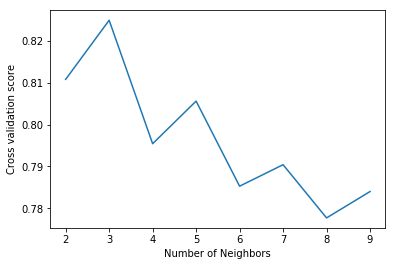

In [15]:
plt.plot(k_range, k_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross validation score')

In [16]:
# Check classification accuracy using the top K that was retrieved from the Knn cross-validation
knn = KNeighborsClassifier(n_neighbors = k_range[((k_scores.index(max(k_scores))))])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa =", cohen_kappa_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))
print("ROC area under curve =", roc_auc_score(y_test, y_pred))

Accuracy = 0.6978882833787466
Cohen's Kappa = 0.24162836965789736
Recall = 0.7314814814814815
F1 score = 0.7942154512412034
ROC area under curve = 0.6487385036042754


In [17]:
# Do a Kfold cross validation on the training data for a logistic regression

logregression = LogisticRegression(solver='liblinear')
CVscores = cross_val_score(logregression, X_train, y_train, cv = 10, scoring = "accuracy")
print(CVscores.mean())

0.6976263386223185


In [18]:
# Check classification accuracy using the logregression

logregression.fit(X_train, y_train)
y_pred = logregression.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa =", cohen_kappa_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))
print("ROC area under curve =", roc_auc_score(y_test, y_pred))

Accuracy = 0.7797456857402362
Cohen's Kappa = 0.37506363645939034
Recall = 0.8313390313390313
F1 score = 0.8574786952688803
ROC area under curve = 0.7042601196963614


In [19]:
#train using a Support vector machine, a random forest and a logistic regression, 

modelSVC.fit(X_train, y_train)
modelRF.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
#Print cross-validation scores 

print(cross_val_score(modelSVC, X_train, y_train)) 
print(cross_val_score(modelRF, X_train, y_train)) 

#Print model validation scores 

print(modelSVC.score(X_train, y_train))
print(modelRF.score(X_train, y_train))


[0.70943465 0.70952643 0.70622247]
[0.791942   0.84104258 0.83452643]
0.7099853157121879
0.9922601566324033


In [21]:
# Check classification accuracy of using the Support Vector Machine
y_pred = modelSVC.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa =", cohen_kappa_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))
print("ROC area under curve =", roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy = 0.8052906448683016
Cohen's Kappa = 0.41210837893022134
Recall = 0.8698005698005699
F1 score = 0.8768579019171394
ROC area under curve = 0.7109069963096809
[[ 987  801]
 [ 914 6106]]


In [22]:
# Check classification of accuracy using the Random forest
y_pred = modelRF.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa =", cohen_kappa_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))
print("ROC area under curve =", roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy = 0.7497729336966394
Cohen's Kappa = 0.3064761179645996
Recall = 0.8037037037037037
F1 score = 0.8365954922894425
ROC area under curve = 0.6708675118071091
[[ 962  826]
 [1378 5642]]


In [23]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [24]:
# create model
model = Sequential()
model.add(Dense(18, input_dim=16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
#run the neural network
model.fit(X_train, y_train, epochs=150, batch_size = 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
32688/32688 [==============================] - 1s 30us/step - loss: 0.6351 - acc: 0.6200
Epoch 2/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5687 - acc: 0.7007
Epoch 3/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5577 - acc: 0.7081
Epoch 4/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5530 - acc: 0.7145
Epoch 5/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5504 - acc: 0.7164
Epoch 6/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5490 - acc: 0.7161
Epoch 7/150
32688/32688 [==============================] - 0s 7us/step - loss: 0.5477 - acc: 0.7164
Epoch 8/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5466 - acc: 0.7173
Epoch 9/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5456 - acc: 0.7182
Epoch 10/150
32688/32688 [=========================

Epoch 79/150
32688/32688 [==============================] - 0s 7us/step - loss: 0.5323 - acc: 0.7241
Epoch 80/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5318 - acc: 0.7233
Epoch 81/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5318 - acc: 0.7224
Epoch 82/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5317 - acc: 0.7234
Epoch 83/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5315 - acc: 0.7230
Epoch 84/150
32688/32688 [==============================] - 0s 7us/step - loss: 0.5314 - acc: 0.7237
Epoch 85/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5315 - acc: 0.7235A: 0s - loss: 0.5316 - acc: 0.722
Epoch 86/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5313 - acc: 0.7248
Epoch 87/150
32688/32688 [==============================] - 0s 6us/step - loss: 0.5311 - acc: 0.7233
Epoch 88/150
32688/32688 [==============================] 

In [27]:
#make predictions and round answers
y_pred = model.predict(X_test)
rounded = [round(x[0]) for x in y_pred]
y_pred = np.array(rounded, dtype = 'int64')

print("Accuracy =", metrics.accuracy_score(y_test, y_pred))
print("Cohen's Kappa =", cohen_kappa_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 score =", f1_score(y_test, y_pred))
print("ROC area under curve =", roc_auc_score(y_test, y_pred))

Accuracy = 0.7250227066303361
Cohen's Kappa = 0.32605715602813223
Recall = 0.7383190883190883
F1 score = 0.8106036909602753
ROC area under curve = 0.7055689401326984


### The best results result from the SVM

Accuracy = 0.8052906448683016

Cohen's Kappa = 0.41210837893022134

Recall = 0.8698005698005699

F1 score = 0.8768579019171394

ROC area under curve = 0.7109069963096809